# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm
from sklearn.linear_model import LinearRegression
import seaborn as sns




In [2]:
student_data = pd.DataFrame({ "StudentID" :list(range(1,11)), "Age": [17,51,27,21,36,48,19,26,54,30],"Tardies": [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})

In [3]:
student_data

,StudentID,Age,Tardies
0,1,17,10
1,2,51,1
2,3,27,5
3,4,21,9
4,5,36,4
5,6,48,2
6,7,19,9
7,8,26,6
8,9,54,0
9,10,30,3


Draw a dispersion diagram (scatter plot) for the data.

<AxesSubplot:xlabel='Age', ylabel='Tardies'>

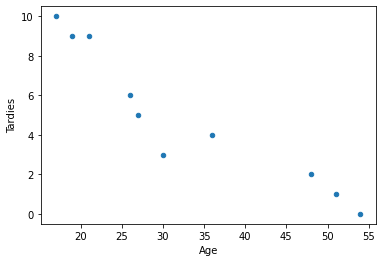

In [4]:
student_data.plot.scatter("Age", "Tardies", s = None, c = None)

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [5]:
# There is a clear negative correlation where the younger the students, the more frequent they arrive late to class.


Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [6]:
student_data.corr()

,StudentID,Age,Tardies
StudentID,1.000000,0.186190,-0.347113
Age,0.186190,1.000000,-0.939163
Tardies,-0.347113,-0.939163,1.000000


In [7]:
student_data.cov()

,StudentID,Age,Tardies
StudentID,9.166667,7.722222,-3.722222
Age,7.722222,187.655556,-45.566667
Tardies,-3.722222,-45.566667,12.544444


Both the correlation and the covariance helps us understand the correlation between 2 variables. However the covariance can be from negative infinite to positive infinite and the correlation goes from -1 to 1. As we can see,the age and the tardies have a strong negative correlation as the correlation value is -0.939163. This tells us that the younger the student, the higher number of days he arrives late. Moreover, being the covariance -45.566667 tells us the same, the younger the student, the higher number of days he arrives late. 

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [8]:
# Your response here.
lr1 = LinearRegression()
lr1.fit(
    X= student_data[["Age"]],
    y= student_data.Tardies
)

LinearRegression()

In [9]:
best_m = lr1.coef_[0]
best_n = lr1.intercept_

In [10]:
best_m

-0.2428207709159808

In [11]:
best_n

12.888803363135768

In [12]:
best_m*30 + best_n

5.604180235656344

The outcome variable would be the number of days the student arrives late, and we are using a linar regression.
y = -0.2428207709159808*Age + 12.888803363135768

if you multiply the age of a student times m and add n, you will get a prediction of how many days he will arrive late. 

Plot your regression model on your scatter plot.

<AxesSubplot:xlabel='Age', ylabel='Tardies'>

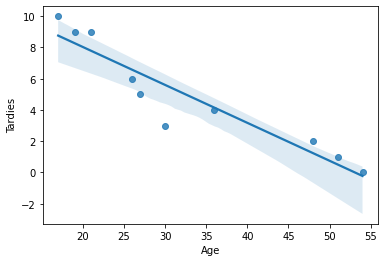

In [13]:
sns.regplot(x="Age", y="Tardies", data=student_data)

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

The lower the age, the more days the student will arrive late.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [14]:
!pwd

/Users/jaimecabanyes/Desktop/IRON_HACK/ih_labs/lab-regression-analysis


In [15]:
vehicles = pd.read_csv("vehicles.csv")

In [16]:
vehicles2 = vehicles[["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year","CO2 Emission Grams/Mile"]]

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [17]:
vehicles2.corr()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [18]:
from sklearn import linear_model

In [19]:
vehicles2.head()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
0,1984,4.0,19.388824,17,1950,522.764706
1,1984,6.0,25.354615,13,2550,683.615385
2,1985,4.0,20.600625,16,2100,555.437500
3,1985,6.0,25.354615,13,2550,683.615385
4,1987,6.0,20.600625,16,2550,555.437500


In [20]:
vehicles2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35952 entries, 0 to 35951
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     35952 non-null  int64  
 1   Cylinders                35952 non-null  float64
 2   Fuel Barrels/Year        35952 non-null  float64
 3   Combined MPG             35952 non-null  int64  
 4   Fuel Cost/Year           35952 non-null  int64  
 5   CO2 Emission Grams/Mile  35952 non-null  float64
dtypes: float64(3), int64(3)
memory usage: 1.6 MB


In [21]:
vehicles2.astype(float)

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
0,1984.0,4.0,19.388824,17.0,1950.0,522.764706
1,1984.0,6.0,25.354615,13.0,2550.0,683.615385
2,1985.0,4.0,20.600625,16.0,2100.0,555.437500
3,1985.0,6.0,25.354615,13.0,2550.0,683.615385
4,1987.0,6.0,20.600625,16.0,2550.0,555.437500
...,...,...,...,...,...,...
35947,2013.0,3.0,9.155833,36.0,1100.0,244.000000
35948,2014.0,3.0,9.155833,36.0,1100.0,243.000000
35949,2015.0,3.0,9.155833,36.0,1100.0,244.000000
35950,2016.0,3.0,9.155833,36.0,1100.0,246.000000


In [37]:
lr2 = LinearRegression()
lr2.fit(
    X= vehicles2[["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year"]],
    y= vehicles2["CO2 Emission Grams/Mile"]
)

LinearRegression()

In [23]:
best_m1 = lr2.coef_
best_n1 = lr2.intercept_

In [24]:
best_m1

array([-0.32061673,  1.87879976, 19.05292507, -3.04039938,  0.03230948])

In [25]:
best_n1

769.8882836465598

CO2 emissions = (-0.32061673*year) + (1.87879976*Cilinders) + (19.05292507*Fuel Barrels/Year) 
+(-3.04039938*Combined MPG) + 0.03230948*Fuel Cost/Year + 769.8882836465598

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [35]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [26]:
#This is a multiple linear regression line where having all the variables such as year, cilinders, ...etc, 
#you would be able to calculate the CO2 emissions that a car produces.

In [49]:
vehicles2["prediction"] = ((vehicles2["Year"]*-0.32061673 ) + (vehicles2["Cylinders"]*1.87879976)
                           +(vehicles2["Fuel Barrels/Year"]*19.05292507) + (vehicles2["Combined MPG"]*-3.04039938)
                           + (vehicles2["Fuel Cost/Year"]*0.03230948) + 769.8882836465598)
        

/var/folders/f9/ww50zmn51ylc9hycc8vysr9c0000gn/T/ipykernel_5951/4254362406.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicles2["prediction"] = ((vehicles2["Year"]*-0.32061673 ) + (vehicles2["Cylinders"]*1.87879976)


In [51]:
vehicles2.head(10)

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile,prediction
0,1984,4.0,19.388824,17,1950,522.764706,522.030389
1,1984,6.0,25.354615,13,2550,683.615385,671.001059
2,1985,4.0,20.600625,16,2100,555.437500,552.684956
3,1985,6.0,25.354615,13,2550,683.615385,670.680442
4,1987,6.0,20.600625,16,2550,555.437500,570.340588
5,1997,4.0,14.982273,22,1500,403.954545,404.163426
6,1997,4.0,13.733750,24,1400,370.291667,371.063669
7,1997,6.0,16.480500,20,1650,444.350000,447.393858
8,1998,4.0,14.982273,22,1500,403.954545,403.842809
9,1998,4.0,13.733750,24,1400,370.291667,370.743053


In [54]:
prediction_mean=  vehicles2.prediction.mean()

In [56]:
TSS = ((vehicles2["CO2 Emission Grams/Mile"] - prediction_mean)** 2).sum()
RSS = ((vehicles2["CO2 Emission Grams/Mile"] - vehicles2.prediction)**2).sum()
                           

In [57]:
r2 = (TSS - RSS) / (TSS)
r2

0.9808734920269103

The most importanta variables i our multiple regression are the independent variables as they help us predict CO2 emissions of a car knowing those variables. Moreover, we can say that the linear multiple regression is very confident as we have a r2 very close to 1. We can also see this by having a look visually at the predictions made.

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [58]:
invitations = pd.DataFrame({ "Invitations" :[1,3,4,6,8,9,11,14], "Attendance": [1,2,4,4,5,7,8,13]})

In [68]:
invitations["Absentism"] = (invitations["Invitations"] - invitations["Attendance"])

In [69]:
invitations

,Invitations,Attendance,Absentism
0,1,1,0
1,3,2,1
2,4,4,0
3,6,4,2
4,8,5,3
5,9,7,2
6,11,8,3
7,14,13,1


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [73]:
lr3 = LinearRegression()
lr3.fit(
    X= invitations[["Invitations"]],
    y= invitations.Absentism
)

LinearRegression()

In [76]:
best_m3 = lr3.coef_
best_n3 = lr3.intercept_

In [77]:
best_m3

array([0.15151515])

In [78]:
best_n3

0.43939393939393945

Absentism = Invitations*0.15151515 + 0.43939393939393945

<AxesSubplot:xlabel='Invitations', ylabel='Absentism'>

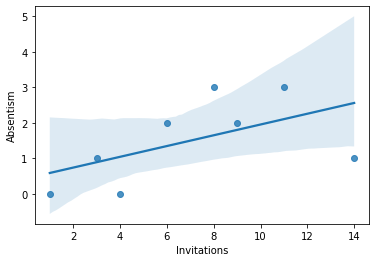

In [79]:
sns.regplot(x="Invitations", y="Absentism", data=invitations)

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

The hypothesis is true as we can see correlation between the invitations and the number of people that don´t got to the party. So the more people you invite to the party, the more absents there are.

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [30]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [31]:
# Your response here. 